In [1]:
#bank.csv CLASSIFACATION ALGORITHM
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#to load dataset
df=pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [3]:
#cheking null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
#check datatypes
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

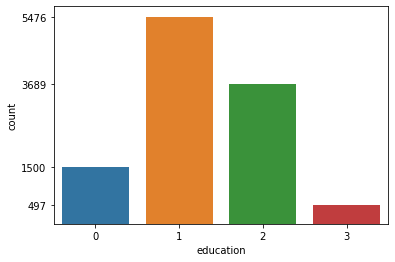

In [5]:
#checking Education count
sns.countplot(data=df,x="education")
f=df["education"].value_counts()
plt.yticks(f)
plt.show()

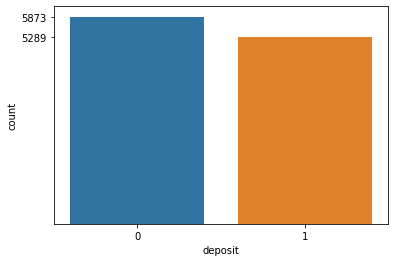

In [6]:
#checking sample of deposit
sns.countplot(data=df,x="deposit")
f=df["deposit"].value_counts()
plt.yticks(f)
plt.show()

In [7]:
#taking Input And Output
X=df.drop("deposit",axis=1) #in
Y=df["deposit"] #out

In [8]:
#calling train_test_split class
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [9]:
#applying Standard Scaller #SCALLING ON DATA
from sklearn.preprocessing import StandardScaler
#creating object
ss=StandardScaler()
Xtrain=ss.fit_transform(Xtrain)
Xtest=ss.transform(Xtest)

In [10]:
#creating a user defined function
def create_model(model): #model is user defined parameter as a object
    model.fit(Xtrain,Ytrain) #training the model
    Ypred=model.predict(Xtest) # testing the model
    print("Classification_Report\n" ,classification_report(Ytest,Ypred))
    print("Confusion_Matrix\n",confusion_matrix(Ytest,Ypred))
    return model

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
#Using Base line Model
#logistic Regression
from sklearn.linear_model import LogisticRegression

In [13]:
#calling the function of logistic rigression by creating object
lr=LogisticRegression()

In [14]:
#calling the function
create_model(lr)

Classification_Report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

Confusion_Matrix
 [[1441  319]
 [ 359 1230]]


LogisticRegression()

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
#creating object of DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [17]:
#call function
dt=create_model(dt)

Classification_Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1760
           1       0.78      0.76      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

Confusion_Matrix
 [[1417  343]
 [ 386 1203]]


In [18]:
#Lets check out what are the important input (INFORMATION GAIN) features that are selected by the decisiontree gini
#index : -
#we use inbuilt method feature_importances_ of DecisionTreeClassifier class(show reduction 
#and select highest reduction)
IG=dt.feature_importances_
print(IG)

[0.08066704 0.03473086 0.01724467 0.01432978 0.00045636 0.08382925
 0.04351335 0.00537373 0.0618071  0.07600023 0.09548687 0.35100223
 0.02466363 0.06799443 0.006645   0.03625547]


In [19]:
dic={"Columns":X.columns,"Information_Gain":IG}
df1=pd.DataFrame(dic)
df1.sort_values("Information_Gain",ascending=False)

,Columns,Information_Gain
11,duration,0.351002
10,month,0.095487
5,balance,0.083829
0,age,0.080667
9,day,0.076000
13,pdays,0.067994
8,contact,0.061807
6,housing,0.043513
15,poutcome,0.036255
1,job,0.034731


In [20]:
from sklearn import tree
'''#create a tree
feature=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=feature,filled=True)'''

'#create a tree\nfeature=X.columns\nfig=plt.figure(figsize=(20,20))\n_=tree.plot_tree(dt,feature_names=feature,filled=True)'

# Pruning Technique
1. max_depth
2. min_samples_leaf

In [21]:
#But we got less score 0.77 % its good but not excellent , 
#region behind less score , overfit means 
#model is overfit so reduced the overfitting situation : - 
#then we use pruning technique 

#How to reduced a overfitting situation 
#By using the Pruning technique : -
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter
#2. min_samples_leaf  : inbuilt parameter
#leaf means no child

In [22]:
#Limitation of decisiontreeclassifier : model is overfit

In [23]:
#1. max_depth parameter  
##create object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier(max_depth=5)
#Note : max_depth can not more than 8
#by default use method : gini index

In [24]:
#train the model
dt1=create_model(dt1)

Classification_Report
               precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

Confusion_Matrix
 [[1316  444]
 [ 229 1360]]


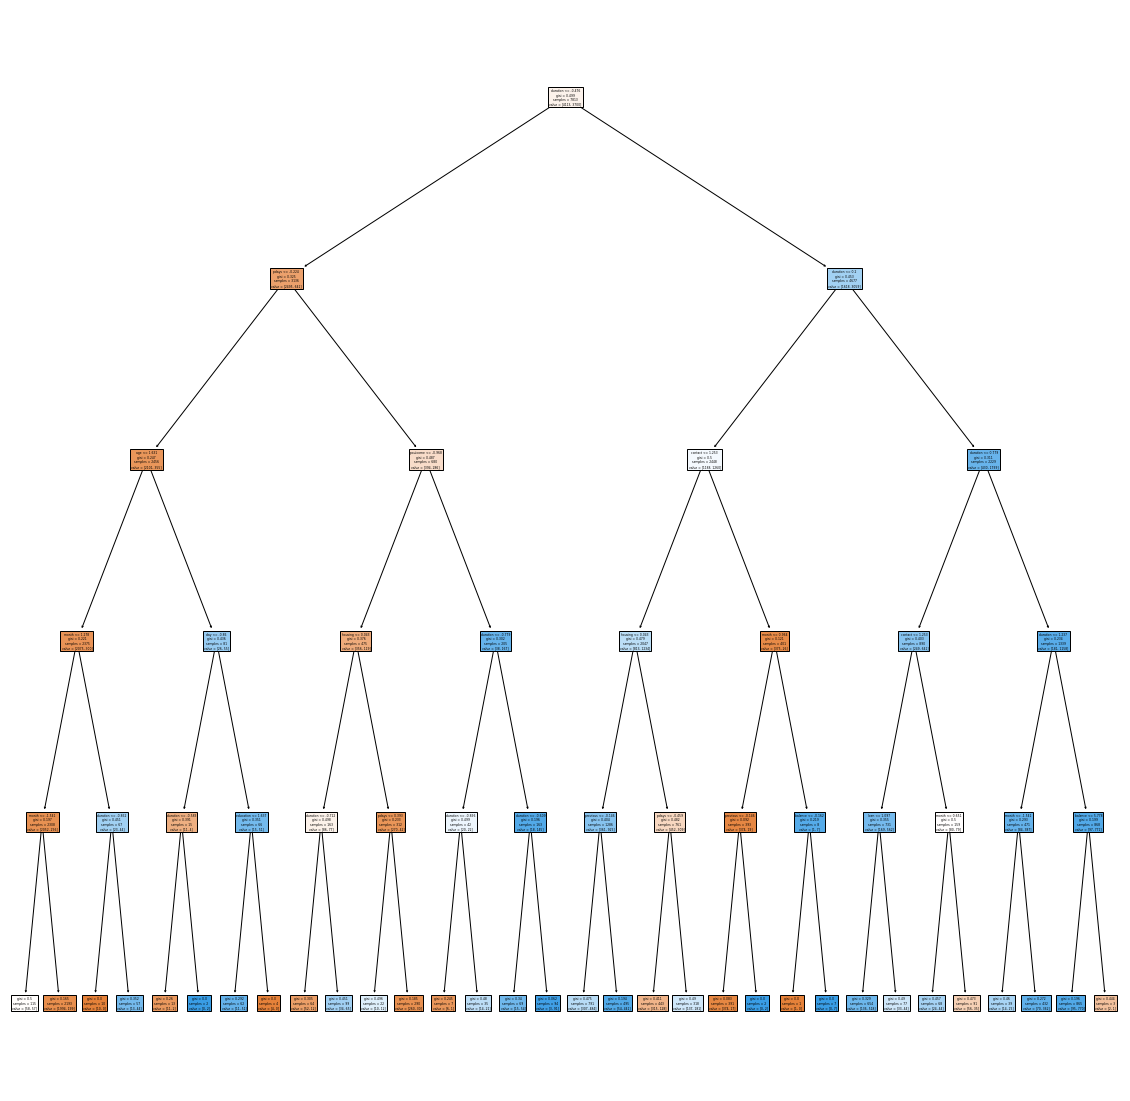

In [25]:
#create a tree
feature=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=feature,filled=True)

In [26]:
#checking features
IG=dt1.feature_importances_

In [27]:
dic={"Columns":X.columns,"Information_Gain":IG}
df1=pd.DataFrame(dic)
df1.sort_values("Information_Gain",ascending=False)

,Columns,Information_Gain
11,duration,0.576413
8,contact,0.119728
6,housing,0.066337
13,pdays,0.066325
10,month,0.052438
15,poutcome,0.051127
14,previous,0.028638
0,age,0.026846
7,loan,0.003762
9,day,0.003512


In [28]:
#2nd purning technique : min_samples_leaf
#min_samples_leaf =50 or more means not less than=50
##create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(min_samples_leaf=50)

In [29]:
#calling function
dt2=create_model(dt2)

Classification_Report
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

Confusion_Matrix
 [[1378  382]
 [ 204 1385]]


In [30]:
IG=dt2.feature_importances_

In [31]:
dic={"Columns":X.columns,"Information_Gain":IG}
df1=pd.DataFrame(dic)
df1.sort_values("Information_Gain",ascending=False)

,Columns,Information_Gain
11,duration,0.499270
10,month,0.109344
8,contact,0.106134
6,housing,0.068702
15,poutcome,0.059791
0,age,0.043692
13,pdays,0.043444
14,previous,0.036101
5,balance,0.018311
1,job,0.004952


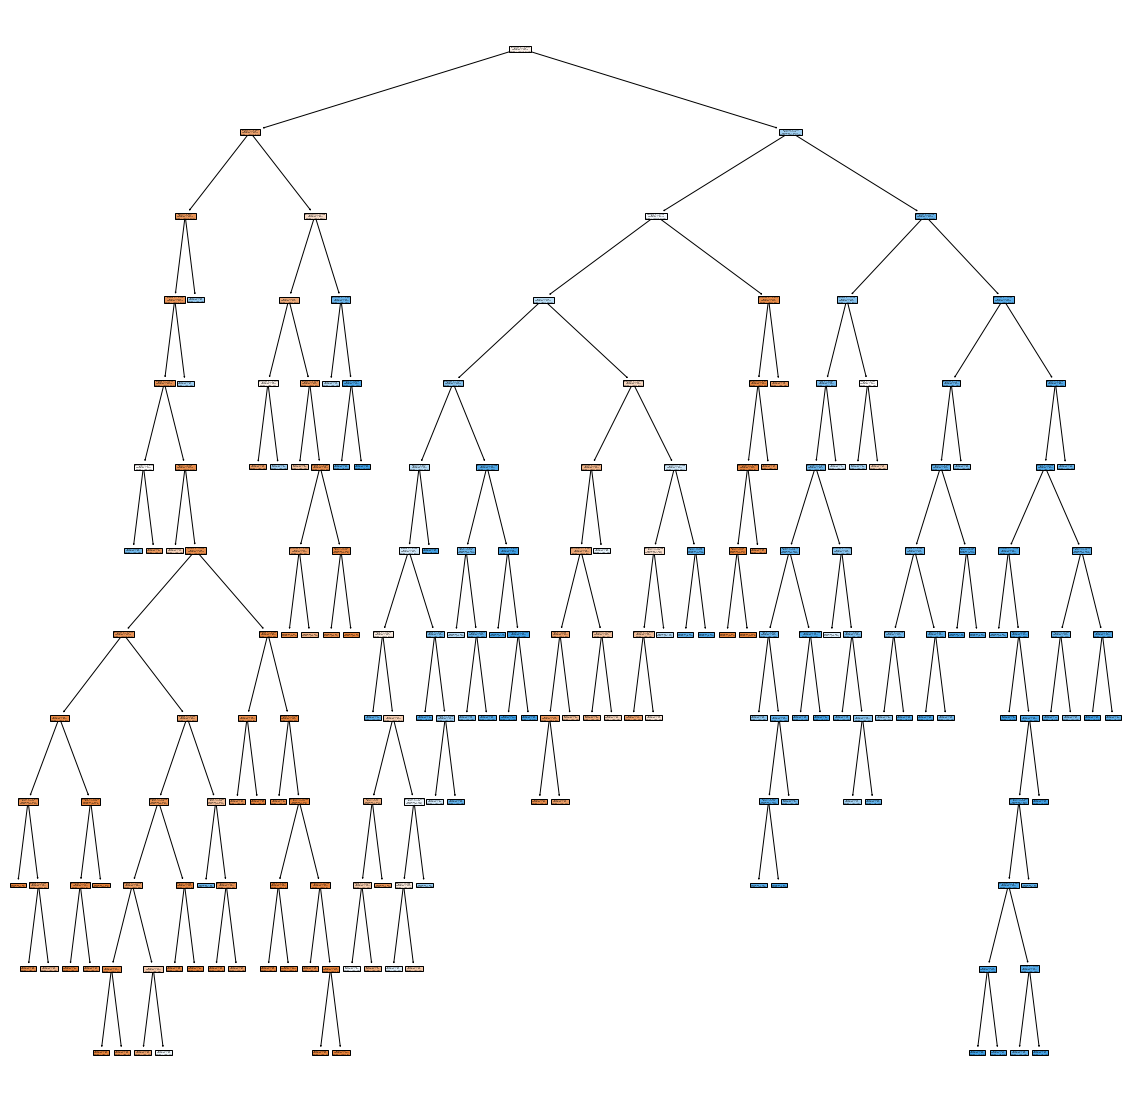

In [32]:
#create a tree
feature=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=feature,filled=True)

In [33]:
#use entropy method of decisiontree 
#means -P(yes)*log2P(yes)-P(No)*log2(P(no))
#here log2 means base of log=2
##create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=80)
#bydefault criterion='gini' means 1-P(yes)^2-Q(no)^2

In [34]:
#call function
dt3=create_model(dt3)

Classification_Report
               precision    recall  f1-score   support

           0       0.84      0.79      0.82      1760
           1       0.78      0.84      0.81      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.82      0.81      3349
weighted avg       0.82      0.81      0.81      3349

Confusion_Matrix
 [[1395  365]
 [ 257 1332]]


# Random Forest

In [ ]:
#Ensembling Technique 
#Random Forest Tree 
#Use Random Forest Tree 
'''
Train the dataset on multiple decisiontreeclassifier 
algorithm 
'''
#Random Forest Tree 
#call Random Forest Tree from package

#ensemble means to train the same dataset from multiple algorithm

In [35]:
#calling the class
from sklearn.ensemble import RandomForestClassifier

In [37]:
#Create object of RandomForestClassifier class
rfc=RandomForestClassifier(n_estimators=10,max_features=8,random_state=1)
#here n_estimators means take how many no. of decisiontree 
#max_features means take how many input

In [38]:
#traing the model
rfc=create_model(rfc)

Classification_Report
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1760
           1       0.82      0.83      0.83      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

Confusion_Matrix
 [[1477  283]
 [ 266 1323]]
